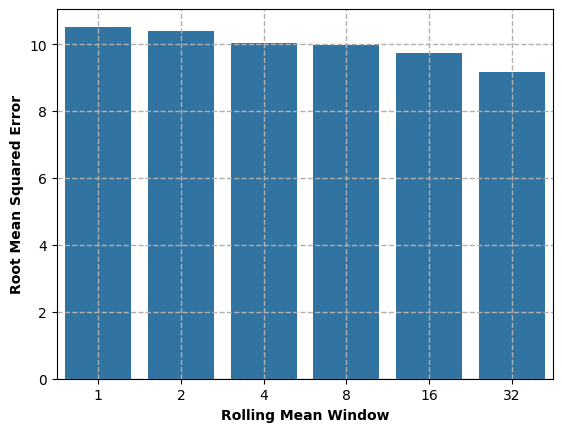

In [3]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns

# Load the data
df = pd.read_csv('smoothing.csv')

g = sns.barplot(data=df, x='y_smoothing', y='root_mean_squared_error')
plt.ylabel('Root Mean Squared Error', fontweight='bold')
plt.xlabel('Rolling Mean Window', fontweight='bold')
g.grid(True, which='both', linestyle='--', linewidth=1)

plt.savefig('smoothing.pdf', bbox_inches='tight', pad_inches=0.2, format='pdf')
plt.show()

In [15]:
### Import the necessary libraries
import numpy as np
import pandas as pd
import vitaldb as vf
import matplotlib.pyplot as plt

### Custom functions
import modules as md
from utils.evaluation import phases_report, get_anaesthesia_phases

### Datasetpath
directory = 'data/'
datasetpath = 'dataset02/'
vitaldbpath = 'vitaldb_tiva/'

bis = md.VitalImport(directory= directory, dataset=datasetpath, vitalpath=vitaldbpath)
bis.load('00_bis.npz')

<Figure size 472.441x236.22 with 0 Axes>

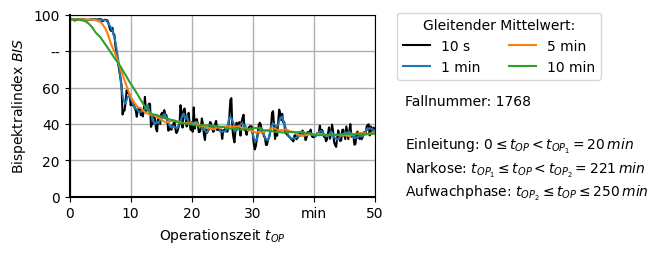

In [78]:
bis = md.VitalImport(directory= directory, dataset=datasetpath, vitalpath=vitaldbpath)
bis.load('00_bis.npz')

groundtruth = np.copy(bis.test_dataset)

j = 8

window = [6, 30, 60]

end = np.where(groundtruth[j] == 0)[0][0]

time = np.arange(0, groundtruth[j,:end].shape[0]) * 10 / 60

groundtruth = groundtruth[j,:end,0]

plt.figure(figsize=(12/2.54, 6/2.54))
plt.rcParams['font.size'] = 10

# Colors
color1 = (0, 0, 0)
color2 = (1, 1, 1)
color3 = (159/255, 182/255, 196/255)
color4 = (125/255, 102/255, 102/255)
color5 = (153/255, 0, 0)

# Create the first plot
fig, ax1 = plt.subplots(figsize=(10/2.54, 6/2.54))
ax1.plot(time, groundtruth, label='10 s', color=color1)
for i in window:
    #bis = np.convolve(groundtruth, np.ones(i)/i, mode='same')
    bis = pd.DataFrame(groundtruth.T).rolling(min_periods=1,window=i, center=True).mean().to_numpy()[:,0]
    ax1.plot(time, bis, label=str(int(i*10/60))+' min')

ax1.set_xlabel('Operationszeit $t_{OP}$')
ax1.set_ylabel('Bispektralindex $BIS$')

ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(True, linewidth=1.0)

# Axis settings
ax = plt.gca()
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

# Limits
ax1.set_xlim(left=0, right=50)
ax1.set_ylim(bottom=0, top=100)

# Einheiten auf x-Achse
xunit = 'min'
ticks = ax1.get_xticks()
ticks = [int(tick) for tick in ticks]
ticks_with_units = [xunit if i == len(ticks) - 2 else ticks[i] for i in range(len(ticks))]
ax1.set_xticks(ticks)
ax1.set_xticklabels(ticks_with_units)

# Einheiten auf y1-Achse
yunit = '--'
ticks = ax1.get_yticks()
ticks = [int(tick) for tick in ticks]
ticks_with_units = [yunit if i == len(ticks) - 2 else ticks[i] for i in range(len(ticks))]
ax1.set_yticks(ticks)
ax1.set_yticklabels(ticks_with_units)

t = 55
ax1.text(t, 50, s='Fallnummer: 1768')
ax1.text(t, 26, s='Einleitung: $0 \leq t_{OP} < t_{OP_1} = 20 \, min$')
ax1.text(t, 13, s='Narkose: $t_{OP_1} \leq t_{OP} < t_{OP_2} = 221 \, min$')
ax1.text(t, 0, s='Aufwachphase: $t_{OP_2} \leq t_{OP} \leq 250 \, min$')

ax1.legend(loc='upper left', bbox_to_anchor=(1.05, 1.05), ncol=2, title='Gleitender Mittelwert:')

plt.show()
#plt.savefig('narkosephasen.pdf', bbox_inches='tight', pad_inches=0.2, format='pdf')